In [1]:
#!gdown 15ZSv_07b3HCKKn08jSDLl4JO4EFy8t-t

#!tar -xzf aclImdb_v1.tar.gz
#!rm -r aclImdb/train/unsup

In [2]:
from dotenv import load_dotenv
load_dotenv('../.env')


True

In [3]:

import keras

train_ds, val_ds = keras.utils.text_dataset_from_directory(
    '../data/aclImdb/train', validation_split=0.2, subset='both', seed=42
)
test_ds = keras.utils.text_dataset_from_directory('../data/aclImdb/test')

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


2025-08-12 07:51:28.729052: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Max
2025-08-12 07:51:28.729229: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2025-08-12 07:51:28.729240: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2025-08-12 07:51:28.729256: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-12 07:51:28.729267: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 25000 files belonging to 2 classes.


In [4]:
feature, target = train_ds.unbatch().take(1).get_single_element()
print(feature.numpy()[:100])
print(target.numpy())

b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell '
0


In [5]:
import keras_nlp

classifier = keras_nlp.models.BertClassifier.from_preset(
    'bert_tiny_en_uncased',
    # 'bert_base_en_uncased',
    num_classes=2,
)

classifier.summary()

Preprocessor: "bert_text_classifier_preprocessor"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                                                  ‚îÉ                                   Config ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ bert_tokenizer (BertTokenizer)                                ‚îÇ                       Vocab size: 30,522 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

Model: "bert_text_classifier"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                  ‚îÉ Output Shape              ‚îÉ         Param # ‚îÉ Connected to               ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ padding_mask (InputLayer)     ‚îÇ (None, None)              ‚îÇ               0 ‚îÇ -                          ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ segment_ids (InputLayer)      ‚îÇ (None, None)              ‚îÇ               0 ‚îÇ -                          ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ token_ids (InputLayer)        ‚îÇ (None, None)              ‚îÇ               0 ‚îÇ -                          ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bert_backbone (BertBackbone)  ‚îÇ [(None, 128), (None,      ‚îÇ       4,385,920 ‚îÇ padding_mask[0][0],        ‚îÇ
‚îÇ                               ‚îÇ None, 128)]               ‚îÇ                 ‚îÇ segment_ids[0][0],         ‚îÇ
‚îÇ                               ‚îÇ                           ‚îÇ                 ‚îÇ token_ids[0][0]            ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ classifier_dropout (Dropout)  ‚îÇ (None, 128)               ‚îÇ               0 ‚îÇ bert_backbone[0][0]        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ logits (Dense)                ‚îÇ (None, 2)                 ‚îÇ             258 ‚îÇ classifier_dropout[0][0]   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 4,386,178 (16.73 MB)

 Trainable params: 4,386,178 (16.73 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True,
)

In [7]:
hist_multi = classifier.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[early_stopping_cb])
hist = hist_multi

Epoch 1/100


2025-08-12 07:51:32.196064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35s 50ms/step - loss: 0.5684 - sparse_categorical_accuracy: 0.6962 - val_loss: 0.3589 - val_sparse_categorical_accuracy: 0.8482
Epoch 2/100
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 50ms/step - loss: 0.3194 - sparse_categorical_accuracy: 0.8675 - val_loss: 0.2990 - val_sparse_categorical_accuracy: 0.8764
Epoch 3/100
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 32s 51ms/step - loss: 0.2494 - sparse_categorical_accuracy: 0.9048 - val_loss: 0.2907 - val_sparse_categorical_accuracy: 0.8812
Epoch 4/100
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 33s 52ms/step - loss: 0.1975 - sparse_categorical_accuracy: 0.9276 - val_loss: 0.3267 - val_sparse_categorical_accuracy: 0.8786
Epoch 5/100
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 33s 52ms/step - loss: 0.1450 - sparse_categorical_accuracy: 0.9476 - val_loss: 0.3375 - val_spa

In [8]:
hist_multi.history

{'loss': [0.46745365858078003,
  0.3030501902103424,
  0.23804526031017303,
  0.18354249000549316,
  0.1380123645067215,
  0.0992596223950386],
 'sparse_categorical_accuracy': [0.7771000266075134,
  0.8753499984741211,
  0.9075499773025513,
  0.932449996471405,
  0.9504500031471252,
  0.96670001745224],
 'val_loss': [0.3589136302471161,
  0.2990482449531555,
  0.2907133400440216,
  0.32670095562934875,
  0.33751484751701355,
  0.36057543754577637],
 'val_sparse_categorical_accuracy': [0.8482000231742859,
  0.8763999938964844,
  0.8812000155448914,
  0.878600001335144,
  0.881600022315979,
  0.8809999823570251]}

In [9]:
import keras_nlp

classifier = keras_nlp.models.BertClassifier.from_preset(
    'bert_tiny_en_uncased',
    num_classes=1,
    activation='sigmoid',
)

rmsprop = keras.optimizers.RMSprop(learning_rate=0.001)
classifier.compile(
    loss='binary_crossentropy',
    #optimizer=rmsprop,
    metrics=['accuracy']
)

hist_bin = classifier.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[early_stopping_cb])
hist = hist_bin

Epoch 1/100
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38s 55ms/step - accuracy: 0.6661 - loss: 0.5982 - val_accuracy: 0.8196 - val_loss: 0.4079
Epoch 2/100
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41s 65ms/step - accuracy: 0.8643 - loss: 0.3307 - val_accuracy: 0.8740 - val_loss: 0.3058
Epoch 3/100
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49s 78ms/step - accuracy: 0.8971 - loss: 0.2585 - val_accuracy: 0.8782 - val_loss: 0.3020


In [10]:
hist.history

{'accuracy': [0.7599499821662903, 0.8758500218391418, 0.9053999781608582],
 'loss': [0.49218007922172546, 0.3070255219936371, 0.24055956304073334],
 'val_accuracy': [0.819599986076355, 0.8740000128746033, 0.8781999945640564],
 'val_loss': [0.40785276889801025, 0.30582988262176514, 0.30200156569480896]}

In [24]:
hist = hist_multi

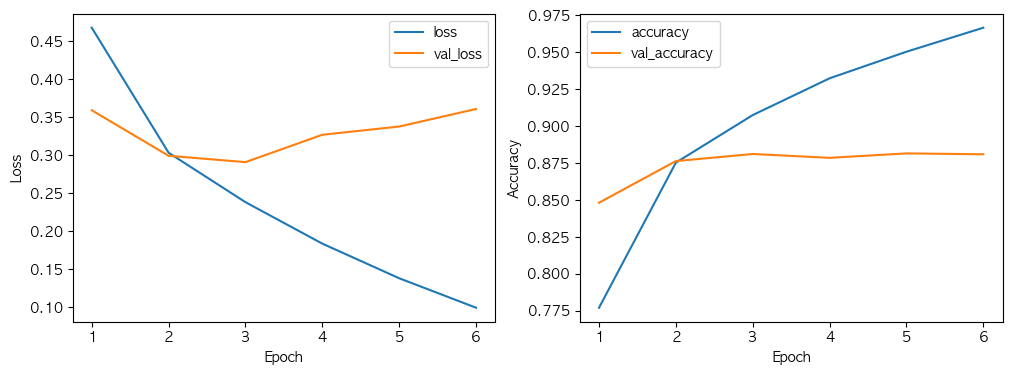

In [26]:
from matplotlib import pyplot as plt
import numpy as np

epochs = np.array(hist.epoch) + 1
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(epochs, hist.history['loss'], label='loss')
axs[0].plot(epochs, hist.history['val_loss'], label='val_loss')
axs[0].set_xticks(epochs)
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(epochs, hist.history['sparse_categorical_accuracy'], label='accuracy')
axs[1].plot(epochs, hist.history['val_sparse_categorical_accuracy'], label='val_accuracy')
axs[1].set_xticks(epochs)
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')

axs[1].legend()
plt.show()

In [12]:
from datasets import load_dataset

#nsmc = load_dataset('e9t/nsmc', trust_remote_code=True)
nsmc = load_dataset('Blpeng/nsmc', trust_remote_code=True)
nsmc

`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'Blpeng/nsmc' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.
Repo card metadata block was not found. Setting CardData to empty.


DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'id', 'document', 'label'],
        num_rows: 150000
    })
    test: Dataset({
        features: ['Unnamed: 0', 'id', 'document', 'label'],
        num_rows: 50000
    })
})

In [13]:
# Î∂àÌïÑÏöîÌïú Ïó¥ ÏÇ≠Ï†ú Î∞è ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞ ÏÇ≠Ï†ú
from datasets import DatasetDict

nsmc = nsmc.map(remove_columns=["Unnamed: 0"])
nsmc = DatasetDict({
    split: nsmc[split].filter(lambda x: x['document'] and x['document'].strip())
    for split in nsmc})

In [14]:
nsmc['train'][0]

{'id': 9976970, 'document': 'ÏïÑ ÎçîÎπô.. ÏßÑÏßú ÏßúÏ¶ùÎÇòÎÑ§Ïöî Î™©ÏÜåÎ¶¨', 'label': 0}

In [15]:
from huggingface_hub import list_datasets
all_datasets = [ds.id for ds in list_datasets()]

for ds in all_datasets:
    if 'nsmc' in ds:
        print(ds)


# print(all_datasets)
print(len(all_datasets))


e9t/nsmc
Blpeng/nsmc
iamyuna/kcbert-nsmc-tokenizer
brandonsmckay/embeddingstest
ynsmcd/nesd
ynsmcd/twiiter
ynsmcd/slownesd
ynsmcd/SPE
ynsmcd/lolo
ynsmcd/amara
470438


In [16]:
#!uv add datasets evaluate
from transformers import AutoModelForSequenceClassification, AutoTokenizer

bert_kor = AutoModelForSequenceClassification.from_pretrained(
    #'bert-base-multilingual-cased',
    'bongsoo/bert-small-kor-v1',
     num_labels=2,
     hidden_dropout_prob=0.3,      # hidden layer dropout
     attention_probs_dropout_prob=0.3  # attention dropout
)

bert_kor_tokenizer = AutoTokenizer.from_pretrained('bongsoo/bert-small-kor-v1')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bongsoo/bert-small-kor-v1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
bert_kor

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(10022, 512, padding_idx=0)
      (position_embeddings): Embedding(512, 512)
      (token_type_embeddings): Embedding(2, 512)
      (LayerNorm): LayerNorm((512,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.3, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-3): 4 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=512, out_features=512, bias=True)
              (key): Linear(in_features=512, out_features=512, bias=True)
              (value): Linear(in_features=512, out_features=512, bias=True)
              (dropout): Dropout(p=0.3, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=512, out_features=512, bias=True)
              (LayerNorm): LayerNorm((512,), eps=1e-1

In [18]:
def tokenize(batch):
    # batch['document']Í∞Ä Î¨∏ÏûêÏó¥ Î¶¨Ïä§Ìä∏ÏûÑÏùÑ Î™ÖÏãúÏ†ÅÏúºÎ°ú Î≥¥Ïû•
    texts = [str(doc) for doc in batch['document']]
    return bert_kor_tokenizer(
        texts,
        padding=True,
        truncation=True,
        # max_length=512,
        # return_tensors=None
    )

nsmc_tokenized = nsmc.map(tokenize, batched=True, batch_size=None)
#nsmc_tokenized

Map:   0%|          | 0/149995 [00:00<?, ? examples/s]

In [19]:
print(nsmc_tokenized)

DatasetDict({
    train: Dataset({
        features: ['id', 'document', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 149995
    })
    test: Dataset({
        features: ['id', 'document', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 49997
    })
})


In [20]:
nsmc_train = nsmc_tokenized['train'].shuffle(seed=42).select(range(50000))
nsmc_test = nsmc_tokenized['test'].shuffle(seed=42).select(range(10000))

In [21]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
import evaluate
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

metric = evaluate.load('accuracy')

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(
    output_dir='bert_kor_nsmc_02',
    num_train_epochs=20,
    eval_strategy='epoch',
    save_strategy='epoch',
    logging_strategy='steps',  # Î°úÍπÖ Ï†ÑÎûµ Ï∂îÍ∞Ä
    logging_steps=len(nsmc_train) // 8,  # Ïò§ÌÉÄ ÏàòÏ†ï
    eval_steps=len(nsmc_train) // 4,  # eval Ï£ºÍ∏∞ ÏÑ§Ï†ï
    load_best_model_at_end=True,
    metric_for_best_model='eval_accuracy',  # ÏµúÍ≥† Î™®Îç∏ ÏÑ†ÌÉù Í∏∞Ï§Ä
    greater_is_better=True,
    report_to='none',
    #report_to='wandb',
    dataloader_pin_memory=False,  # Î©îÎ™®Î¶¨ Ìö®Ïú®ÏÑ±
    weight_decay=0.01,
    warmup_steps=500,
    learning_rate=2e-5,
)

# training setÏùò ÏûëÏùÄ subsetÏúºÎ°ú train eval ÏÉùÏÑ± (Î©îÎ™®Î¶¨ Ï†àÏïΩ)
nsmc_train_eval = nsmc_train.select(range(min(2000, len(nsmc_train))))

trainer = Trainer(
    model=bert_kor,
    args=training_args,
    train_dataset=nsmc_train,
    eval_dataset=nsmc_test,  # validationÏö©
    compute_metrics=compute_metrics,
)

# ÏàòÎèôÏúºÎ°ú train set evaluation Ï∂îÍ∞ÄÌïòÎäî Î∞©Î≤ï
class CustomTrainer(Trainer):
    def evaluate(self, eval_dataset=None, ignore_keys=None, metric_key_prefix="eval"):
        # Î®ºÏ†Ä Í∏∞Î≥∏ eval_dataset (test) ÌèâÍ∞Ä
        eval_results = super().evaluate(eval_dataset, ignore_keys, metric_key_prefix)
        
        # train datasetÎèÑ ÌèâÍ∞Ä (subset ÏÇ¨Ïö©)
        train_results = super().evaluate(nsmc_train_eval, ignore_keys, "train")
        
        # Í≤∞Í≥º Ìï©ÏπòÍ∏∞
        eval_results.update(train_results)
        return eval_results

custom_trainer = CustomTrainer(
    model=bert_kor,
    args=training_args,
    train_dataset=nsmc_train,
    eval_dataset=nsmc_test,
    compute_metrics=compute_metrics,
)

custom_trainer.add_callback(EarlyStoppingCallback(early_stopping_patience=3))

custom_trainer.train()

  0%|          | 0/125000 [00:00<?, ?it/s]

{'loss': 0.5003, 'grad_norm': 7.763807773590088, 'learning_rate': 1.9076305220883535e-05, 'epoch': 1.0}


  0%|          | 0/1250 [00:00<?, ?it/s]

{'eval_loss': 0.4515933096408844, 'eval_accuracy': 0.8247, 'eval_runtime': 15.3865, 'eval_samples_per_second': 649.92, 'eval_steps_per_second': 81.24, 'epoch': 1.0}


  0%|          | 0/250 [00:00<?, ?it/s]

early stopping required metric_for_best_model, but did not find eval_accuracy so early stopping is disabled


{'train_loss': 0.4370386302471161, 'train_accuracy': 0.818, 'train_runtime': 2.9788, 'train_samples_per_second': 671.405, 'train_steps_per_second': 83.926, 'epoch': 1.0}
{'loss': 0.4167, 'grad_norm': 12.935795783996582, 'learning_rate': 1.807228915662651e-05, 'epoch': 2.0}


  0%|          | 0/1250 [00:00<?, ?it/s]

{'eval_loss': 0.4396882951259613, 'eval_accuracy': 0.8275, 'eval_runtime': 15.3192, 'eval_samples_per_second': 652.774, 'eval_steps_per_second': 81.597, 'epoch': 2.0}


  0%|          | 0/250 [00:00<?, ?it/s]

early stopping required metric_for_best_model, but did not find eval_accuracy so early stopping is disabled


{'train_loss': 0.39376300573349, 'train_accuracy': 0.841, 'train_runtime': 2.8905, 'train_samples_per_second': 691.912, 'train_steps_per_second': 86.489, 'epoch': 2.0}
{'loss': 0.3862, 'grad_norm': 15.056137084960938, 'learning_rate': 1.7068273092369478e-05, 'epoch': 3.0}


  0%|          | 0/1250 [00:00<?, ?it/s]

{'eval_loss': 0.4435461461544037, 'eval_accuracy': 0.8427, 'eval_runtime': 15.1762, 'eval_samples_per_second': 658.925, 'eval_steps_per_second': 82.366, 'epoch': 3.0}


  0%|          | 0/250 [00:00<?, ?it/s]

early stopping required metric_for_best_model, but did not find eval_accuracy so early stopping is disabled


{'train_loss': 0.37871724367141724, 'train_accuracy': 0.855, 'train_runtime': 3.1162, 'train_samples_per_second': 641.811, 'train_steps_per_second': 80.226, 'epoch': 3.0}
{'loss': 0.3719, 'grad_norm': 11.66916275024414, 'learning_rate': 1.606425702811245e-05, 'epoch': 4.0}


  0%|          | 0/1250 [00:00<?, ?it/s]

{'eval_loss': 0.42280706763267517, 'eval_accuracy': 0.8395, 'eval_runtime': 15.5036, 'eval_samples_per_second': 645.012, 'eval_steps_per_second': 80.627, 'epoch': 4.0}


  0%|          | 0/250 [00:00<?, ?it/s]

early stopping required metric_for_best_model, but did not find eval_accuracy so early stopping is disabled


{'train_loss': 0.32195237278938293, 'train_accuracy': 0.8735, 'train_runtime': 3.0884, 'train_samples_per_second': 647.581, 'train_steps_per_second': 80.948, 'epoch': 4.0}
{'loss': 0.3529, 'grad_norm': 5.553444862365723, 'learning_rate': 1.5060240963855424e-05, 'epoch': 5.0}


  0%|          | 0/1250 [00:00<?, ?it/s]

{'eval_loss': 0.40312445163726807, 'eval_accuracy': 0.8508, 'eval_runtime': 15.4531, 'eval_samples_per_second': 647.119, 'eval_steps_per_second': 80.89, 'epoch': 5.0}


  0%|          | 0/250 [00:00<?, ?it/s]

early stopping required metric_for_best_model, but did not find eval_accuracy so early stopping is disabled


{'train_loss': 0.2917196750640869, 'train_accuracy': 0.8835, 'train_runtime': 2.935, 'train_samples_per_second': 681.432, 'train_steps_per_second': 85.179, 'epoch': 5.0}
{'loss': 0.3423, 'grad_norm': 5.898165702819824, 'learning_rate': 1.4056224899598394e-05, 'epoch': 6.0}


  0%|          | 0/1250 [00:00<?, ?it/s]

{'eval_loss': 0.4747602939605713, 'eval_accuracy': 0.849, 'eval_runtime': 15.3052, 'eval_samples_per_second': 653.374, 'eval_steps_per_second': 81.672, 'epoch': 6.0}


  0%|          | 0/250 [00:00<?, ?it/s]

early stopping required metric_for_best_model, but did not find eval_accuracy so early stopping is disabled


{'train_loss': 0.313717246055603, 'train_accuracy': 0.8935, 'train_runtime': 2.9961, 'train_samples_per_second': 667.537, 'train_steps_per_second': 83.442, 'epoch': 6.0}
{'loss': 0.3363, 'grad_norm': 14.225591659545898, 'learning_rate': 1.3052208835341367e-05, 'epoch': 7.0}


  0%|          | 0/1250 [00:00<?, ?it/s]

{'eval_loss': 0.45982158184051514, 'eval_accuracy': 0.8472, 'eval_runtime': 15.5741, 'eval_samples_per_second': 642.091, 'eval_steps_per_second': 80.261, 'epoch': 7.0}


  0%|          | 0/250 [00:00<?, ?it/s]

early stopping required metric_for_best_model, but did not find eval_accuracy so early stopping is disabled


{'train_loss': 0.2863853871822357, 'train_accuracy': 0.8945, 'train_runtime': 3.02, 'train_samples_per_second': 662.257, 'train_steps_per_second': 82.782, 'epoch': 7.0}
{'loss': 0.3264, 'grad_norm': 12.090903282165527, 'learning_rate': 1.204819277108434e-05, 'epoch': 8.0}


  0%|          | 0/1250 [00:00<?, ?it/s]

{'eval_loss': 0.5196211338043213, 'eval_accuracy': 0.8485, 'eval_runtime': 15.1902, 'eval_samples_per_second': 658.319, 'eval_steps_per_second': 82.29, 'epoch': 8.0}


  0%|          | 0/250 [00:00<?, ?it/s]

early stopping required metric_for_best_model, but did not find eval_accuracy so early stopping is disabled


{'train_loss': 0.30771487951278687, 'train_accuracy': 0.899, 'train_runtime': 2.9319, 'train_samples_per_second': 682.161, 'train_steps_per_second': 85.27, 'epoch': 8.0}
{'train_runtime': 2093.2752, 'train_samples_per_second': 477.72, 'train_steps_per_second': 59.715, 'train_loss': 0.3791350146484375, 'epoch': 8.0}


TrainOutput(global_step=50000, training_loss=0.3791350146484375, metrics={'train_runtime': 2093.2752, 'train_samples_per_second': 477.72, 'train_steps_per_second': 59.715, 'total_flos': 4387541673600000.0, 'train_loss': 0.3791350146484375, 'epoch': 8.0})

=== ÌïôÏäµ Î°úÍ∑∏ Î∂ÑÏÑù Ï§ë... ===
Ï¥ù Î°úÍ∑∏ ÏóîÌä∏Î¶¨: 25Í∞ú
üìà Train Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏: 8Í∞ú
üìà Validation Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏: 8Í∞ú
üîç Train Í∏∏Ïù¥ Ï≤¥ÌÅ¨: epochs(8), loss(8), acc(8)
üîç Val Í∏∏Ïù¥ Ï≤¥ÌÅ¨: epochs(8), loss(8), acc(8)


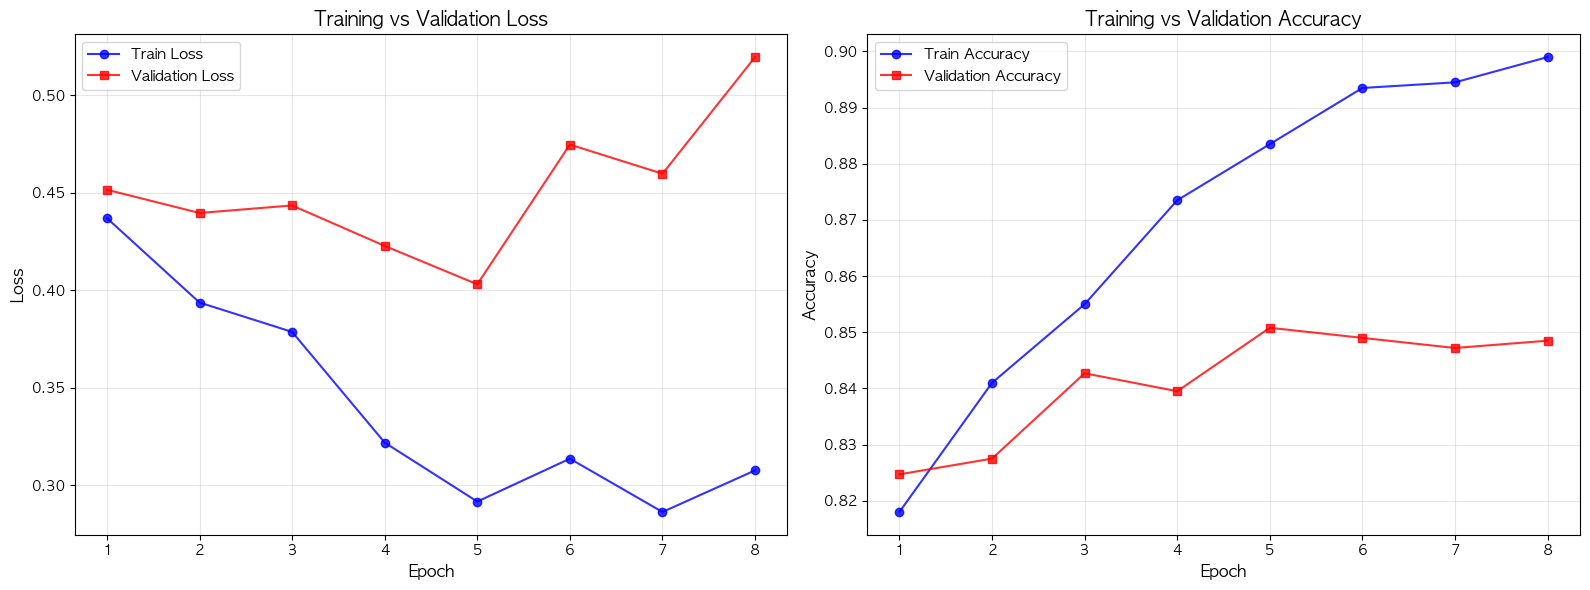


üìä ÏµúÏ¢Ö ÌïôÏäµ ÏÑ±Îä• ÏöîÏïΩ
üîπ Train Loss:      0.3077
üîπ Validation Loss: 0.5196
üîπ Train Accuracy:  89.90%
üîπ Val Accuracy:    84.85%

üîç Í≥ºÏ†ÅÌï© ÏßÑÎã®:
   Loss Ï∞®Ïù¥:     +0.2119 (Val - Train)
   Accuracy Ï∞®Ïù¥: +5.05% (Train - Val)

üü° Í≤∞Î°†: ‚ö†Ô∏è Í≤ΩÎØ∏Ìïú Í≥ºÏ†ÅÌï©

üèÜ ÏµúÍ≥† Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: 85.08% (Epoch 5.0)


In [22]:
# üìä Train vs Validation ÌïôÏäµ Í≥°ÏÑ† Î∂ÑÏÑù
import matplotlib.pyplot as plt
import numpy as np

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'AppleGothic'  # Îß•OSÏö© ÌïúÍ∏Ä Ìè∞Ìä∏
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Î∂ÄÌò∏ Íπ®Ïßê Î∞©ÏßÄ

print("=== ÌïôÏäµ Î°úÍ∑∏ Î∂ÑÏÑù Ï§ë... ===")

# 1. Î°úÍ∑∏ ÌûàÏä§ÌÜ†Î¶¨ÏóêÏÑú Î©îÌä∏Î¶≠ Ï∂îÏ∂ú (ÏïàÏ†ÑÌïú Î∞©Ïãù)
logs = custom_trainer.state.log_history

print(f"Ï¥ù Î°úÍ∑∏ ÏóîÌä∏Î¶¨: {len(logs)}Í∞ú")

# Train Î©îÌä∏Î¶≠Í≥º Validation Î©îÌä∏Î¶≠ÏùÑ Î∂ÑÎ¶¨ÌïòÏó¨ Ï∂îÏ∂ú
train_data = []
val_data = []

for log in logs:
    # Train Î©îÌä∏Î¶≠Ïù¥ ÏûàÎäî Î°úÍ∑∏ (train_lossÏôÄ train_accuracyÍ∞Ä Î™®Îëê ÏûàÏñ¥Ïïº Ìï®)
    if 'train_loss' in log and 'train_accuracy' in log and 'epoch' in log:
        train_data.append({
            'epoch': log['epoch'],
            'loss': log['train_loss'],
            'accuracy': log['train_accuracy']
        })
    
    # Validation Î©îÌä∏Î¶≠Ïù¥ ÏûàÎäî Î°úÍ∑∏ (train Î©îÌä∏Î¶≠Ïù¥ ÏóÜÎäî Í≤ÉÎßå)
    elif 'eval_loss' in log and 'eval_accuracy' in log and 'epoch' in log and 'train_loss' not in log:
        val_data.append({
            'epoch': log['epoch'],
            'loss': log['eval_loss'],
            'accuracy': log['eval_accuracy']
        })

# Îç∞Ïù¥ÌÑ∞ Ï†ïÎ†¨ (epoch ÏàúÏÑúÎåÄÎ°ú)
train_data.sort(key=lambda x: x['epoch'])
val_data.sort(key=lambda x: x['epoch'])

# Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
train_epochs = [d['epoch'] for d in train_data]
train_loss = [d['loss'] for d in train_data]
train_accuracy = [d['accuracy'] for d in train_data]

val_epochs = [d['epoch'] for d in val_data]
val_loss = [d['loss'] for d in val_data]
val_accuracy = [d['accuracy'] for d in val_data]

print(f"üìà Train Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏: {len(train_loss)}Í∞ú")
print(f"üìà Validation Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏: {len(val_loss)}Í∞ú")
print(f"üîç Train Í∏∏Ïù¥ Ï≤¥ÌÅ¨: epochs({len(train_epochs)}), loss({len(train_loss)}), acc({len(train_accuracy)})")
print(f"üîç Val Í∏∏Ïù¥ Ï≤¥ÌÅ¨: epochs({len(val_epochs)}), loss({len(val_loss)}), acc({len(val_accuracy)})")

# 2. ÌïôÏäµ Í≥°ÏÑ† Í∑∏ÎûòÌîÑ
plt.figure(figsize=(16, 6))

# Loss Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 1)
if train_loss and train_epochs:
    plt.plot(train_epochs, train_loss, 'o-', label='Train Loss', color='blue', markersize=6, alpha=0.8)
if val_loss and val_epochs:
    plt.plot(val_epochs, val_loss, 's-', label='Validation Loss', color='red', markersize=6, alpha=0.8)

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training vs Validation Loss', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Accuracy Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 2)
if train_accuracy and train_epochs:
    plt.plot(train_epochs, train_accuracy, 'o-', label='Train Accuracy', color='blue', markersize=6, alpha=0.8)
if val_accuracy and val_epochs:
    plt.plot(val_epochs, val_accuracy, 's-', label='Validation Accuracy', color='red', markersize=6, alpha=0.8)

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training vs Validation Accuracy', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. ÏÑ±Îä• Î∂ÑÏÑù Î∞è Í≥ºÏ†ÅÌï© ÏßÑÎã®
if train_loss and val_loss and train_accuracy and val_accuracy:
    final_train_loss = train_loss[-1]
    final_val_loss = val_loss[-1]
    final_train_acc = train_accuracy[-1]
    final_val_acc = val_accuracy[-1]
    
    print("\n" + "="*50)
    print("üìä ÏµúÏ¢Ö ÌïôÏäµ ÏÑ±Îä• ÏöîÏïΩ")
    print("="*50)
    print(f"üîπ Train Loss:      {final_train_loss:.4f}")
    print(f"üîπ Validation Loss: {final_val_loss:.4f}")
    print(f"üîπ Train Accuracy:  {final_train_acc:.2%}")
    print(f"üîπ Val Accuracy:    {final_val_acc:.2%}")
    
    # Í≥ºÏ†ÅÌï© ÏßÑÎã®
    loss_gap = final_val_loss - final_train_loss
    acc_gap = final_train_acc - final_val_acc
    
    print(f"\nüîç Í≥ºÏ†ÅÌï© ÏßÑÎã®:")
    print(f"   Loss Ï∞®Ïù¥:     {loss_gap:+.4f} (Val - Train)")
    print(f"   Accuracy Ï∞®Ïù¥: {acc_gap:+.2%} (Train - Val)")
    
    # ÏßÑÎã® Í≤∞Í≥º
    if abs(acc_gap) < 0.02:  # 2% ÎØ∏Îßå
        status = "‚úÖ Ïö∞ÏàòÌïú ÏùºÎ∞òÌôî ÏÑ±Îä•"
        color = "üü¢"
    elif abs(acc_gap) < 0.05:  # 5% ÎØ∏Îßå
        status = "‚úÖ Ï¢ãÏùÄ ÏùºÎ∞òÌôî ÏÑ±Îä•"
        color = "üü¢"
    elif abs(acc_gap) < 0.10:  # 10% ÎØ∏Îßå
        status = "‚ö†Ô∏è Í≤ΩÎØ∏Ìïú Í≥ºÏ†ÅÌï©"
        color = "üü°"
    elif abs(acc_gap) < 0.20:  # 20% ÎØ∏Îßå
        status = "‚ö†Ô∏è Ï§ëÍ∞Ñ ÏàòÏ§Ä Í≥ºÏ†ÅÌï©"
        color = "üü°"
    else:
        status = "üö® Ïã¨Í∞ÅÌïú Í≥ºÏ†ÅÌï©"
        color = "üî¥"
    
    print(f"\n{color} Í≤∞Î°†: {status}")
    
    # ÏµúÍ≥† ÏÑ±Îä• Ï∞æÍ∏∞
    if val_accuracy:
        best_val_acc = max(val_accuracy)
        best_epoch = val_epochs[val_accuracy.index(best_val_acc)]
        print(f"\nüèÜ ÏµúÍ≥† Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: {best_val_acc:.2%} (Epoch {best_epoch:.1f})")
        
else:
    print("\n‚ö†Ô∏è Train Î©îÌä∏Î¶≠Ïù¥ Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
    print("Îã§Ïùå ÌïôÏäµÏóêÏÑúÎäî Ï†ÑÏ≤¥ Í≥ºÏ†ïÏù¥ Í∏∞Î°ùÎê† Í≤ÉÏûÖÎãàÎã§.")
